# Data Story

- _Author_: Lucas Gonzalez Santa Cruz
- _Workshop_: Data Science Intensive, Springboard.com
- _Date_: sept 2016

## 1. Introduction

- UK families have been asked about what food they buy for a week since 1974.
- Data between 1974-2000 is open data: http://britains-diet.labs.theodi.org/

### 1.1. Dataset

- I'm using 1995-2000: 6k+ different families each year.
- For each family there's demographic information like place, income, etc.
- Each family wrote what food they bought over one week that year.
- Food was coded as 300+ "minor" codes (each with units and quantities). Say "2 loaves of white bread".
- Each "minor" code was group into a total of 24 "group" codes. Say "bread-like foods".

### 1.2. Goals for this exercise

- Count something interesting.
- Find some trends: high, low, increase, decrease, anomalies.
- Make a bar plot or a histogram.
- Compare two related quantities.
- Make a scatterplot.
- Make a time-series plot.
- Are there some insights? Correlations? A hypothesis I would like to investigate further? Other questions?
- An interesting narrative, a way of presenting the insights using text and plots from the above, that tells us a compelling story?
- What are some other trends/relationships that will make it more complete?

## 2. Data wrangling

### 2.1. Basic environment stuff

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.width = 180
import numpy as np
import seaborn as sns

data = 'data/'
data2000 = 'data/NFSopen_2000/' #http://data.defra.gov.uk/Food/NationalFoodSurvey/NFSopen_2000.zip (etc for all years)
dataRefe = 'data/NFSopen_Reference/' #http://data.defra.gov.uk/Food/NationalFoodSurvey/NFSopen_Reference.zip

### 2.2. Six years of Weekly shopping-carts

Just as an example, in 2000 there were 237424 diary entries.

Each diary entry looked like this: "family number one bought so many pints of milk and so many loaves of bread".

In [2]:
df_purc1995 = pd.DataFrame.from_csv(data+'1995 diary data.txt', sep='\t', index_col=None)
df_purc1995.columns=['hhno', 'fooditem', 'logday', 'purchasevalue', 'minor', 'quantity', 'purchasefree']
df_purc1995['survyear'] = '1995'
df_purc1996 = pd.DataFrame.from_csv(data+'1996 diary data.txt', sep='\t', index_col=None)
df_purc1996.columns=['hhno', 'fooditem', 'logday', 'purchasevalue', 'minor', 'quantity', 'purchasefree']
df_purc1996['survyear'] = '1996'
df_purc1997 = pd.DataFrame.from_csv(data+'1997 diary data.txt', sep='\t', index_col=None)
df_purc1997.columns=['hhno', 'fooditem', 'logday', 'purchasevalue', 'minor', 'quantity', 'purchasefree']
df_purc1997['survyear'] = '1997'
df_purc1998 = pd.DataFrame.from_csv(data+'1998 diary data.txt', sep='\t', index_col=None)
df_purc1998.columns=['hhno', 'fooditem', 'logday', 'purchasevalue', 'minor', 'quantity', 'purchasefree']
df_purc1998['survyear'] = '1998'
df_purc1999 = pd.DataFrame.from_csv(data+'1999 diary data.txt', sep='\t', index_col=None)
df_purc1999.columns=['hhno', 'fooditem', 'logday', 'purchasevalue', 'minor', 'quantity', 'purchasefree']
df_purc1999['survyear'] = '1999'
df_purc2000 = pd.DataFrame.from_csv(data+'2000 diary data.txt', sep='\t', index_col=None)
df_purc2000.columns=['hhno', 'fooditem', 'logday', 'purchasevalue', 'minor', 'quantity', 'purchasefree']
df_purc2000['survyear'] = '2000'

list_of_years = [df_purc1995, df_purc1996, df_purc1997, df_purc1998, df_purc1999, df_purc2000]
df = pd.concat(list_of_years)
df_purchases = df

print "For years 1995-2000, we have a total of {0:6} diary entries.".format(len(df))
print "from a total of {0:5} households.".format(len(df_purchases.hhno.unique()))

For years 1995-2000, we have a total of 1581381 diary entries.
from a total of 42960 households.


In [3]:
"""
#below is code to make sure that HHNO was not repeated across years
id95 = len(df_purc1995.hhno.unique())
id96 = len(df_purc1996.hhno.unique())
id97 = len(df_purc1997.hhno.unique())
id98 = len(df_purc1998.hhno.unique())
id99 = len(df_purc1999.hhno.unique())
id00 = len(df_purc2000.hhno.unique())
print "id95 + id96 + id97 + id98 + id99 + id00: ", id95 + id96 + id97 + id98 + id99 + id00
print "Just to make sure that there are no duplicate id's across years:"
df_dummy = pd.crosstab(df.hhno, df.survyear)
df_dummy.head()
"""

'\n#below is code to make sure that HHNO was not repeated across years\nid95 = len(df_purc1995.hhno.unique())\nid96 = len(df_purc1996.hhno.unique())\nid97 = len(df_purc1997.hhno.unique())\nid98 = len(df_purc1998.hhno.unique())\nid99 = len(df_purc1999.hhno.unique())\nid00 = len(df_purc2000.hhno.unique())\nprint "id95 + id96 + id97 + id98 + id99 + id00: ", id95 + id96 + id97 + id98 + id99 + id00\nprint "Just to make sure that there are no duplicate id\'s across years:"\ndf_dummy = pd.crosstab(df.hhno, df.survyear)\ndf_dummy.head()\n'

### 2.3. Auxiliary files to make sense of the data

In [4]:
#315 detailed "minor" foodcodes --- then aggregated into 183 "major" groups.
df_min_maj = pd.DataFrame.from_csv(dataRefe+'Ref_ Minor and major foods.txt', sep='\t', index_col=None)
df_min_maj.columns=['minor', 'minor_text', 'major']
df_maj_text = pd.DataFrame.from_csv(dataRefe+'Ref_ Major food codes.txt', sep='\t', index_col=None)
df_maj_text.columns=['major', 'major_text']
#Each "foodcode" was described with one of 7 "units": pints, ounces, etc.
df_min_units = pd.DataFrame.from_csv(dataRefe+'Ref_MINFD_Minor_food_codes.txt', sep='\t', index_col=None)
df_min_units.columns=['minor','minor_text','units']
df_min_units.drop(['minor_text'], inplace=True, axis=1) #to avoid duplicate later
#24 more aggregated "groups" were defined, and the 183 previous "detailed groups" were mapped to these 24.
df_grp_text = pd.DataFrame.from_csv(dataRefe+'Ref_ food groups (standard).txt', sep='\t', index_col=None)
df_grp_text.columns=['group','group_text']
df_mapping = pd.DataFrame.from_csv(dataRefe+'Ref_ Major-food group mapping.txt', sep='\t', index_col=None)
df_mapping.columns=['major','group']
#The mapping included 92 groups, and those 24 had to be selected.
group24 = [4006, 9017, 22023, 31041, 46094, 100127, 129129, 135148, 150154, 155161, 162171, 172183, \
           184208, 210231, 233248, 251263, 264264, 267277, 281301, 304313, 314339, 340344, 350354, 380389]
df_maj_group = df_mapping[df_mapping['group'].isin(group24) == True]

### 2.4. So now we know what the whole dataset looks like

We can put it all together:

In [5]:
df = pd.merge(df_purchases, df_min_maj, how='left', on='minor')
df = pd.merge(df, df_min_units, how='left', on='minor')
df = pd.merge(df, df_maj_text, how='left', on='major')
df = pd.merge(df, df_maj_group, how='left', on='major')
df = pd.merge(df, df_grp_text, how='left', on='group')
df = df[['survyear', 'hhno', 'quantity', 'units', 'minor_text', 'group_text', 'minor', 'major', 'major_text', 'group']]
df = df[['survyear', 'hhno', 'minor_text', 'quantity', 'units', 'group_text']]
df_purchases = df
print "shape: ", df_purchases.shape
print "Let's look at the very first diary entries from 1995:"
df.head(5)

shape:  (1581381, 6)
Let's look at the very first diary entries from 1995:


,survyear,hhno,minor_text,quantity,units,group_text
0,1995,224208,SWEET BISCUITS OTHER THAN CHOCOLATE,7.05,oz,"BISCUITS, CAKES, BUNS, CRISPBREADS"
1,1995,224208,MARMALADE,16.01,oz,SUGAR AND PRESERVES
2,1995,224208,PICKLES & SAUCES,11.99,oz,ALL OTHER FOODS
3,1995,224208,DRIED RICE,17.63,oz,"CEREALS, EXCL. BREAD,BUNS,CAKES,BISCUITS"
4,1995,224208,CANNED PEACHES PEARS & PINEAPPLES,8.00,oz,FRUIT & FRUIT PRODS. NOT FRESH


In [6]:
df = df_purchases
print "Purchases: in 1995-2000, {0:4} families bought {1:6} items, {2:3} foods in {3:2} groups.".\
    format(len(df.hhno.unique()), len(df), len(df.minor_text.unique()), len(df.group_text.unique()))

Purchases: in 1995-2000, 42960 families bought 1581381 items, 243 foods in 24 groups.


### 2.6. And we know how food-groups are organised

Because we'll want to know that for a more detailed analysis later.

In [7]:
df = pd.merge(df_min_maj, df_maj_text, how='left', on='major')
df = pd.merge(df, df_maj_group, how='left', on='major')
df = pd.merge(df, df_grp_text, how='left', on='group')
df.head()

,minor,minor_text,major,major_text,group,group_text
0,401,MILK LIQUID FULL PRICE,4,"LIQUID WHOLEMILK, FULL PRICE",4006.0,"LIQUID WHOLEMILK, INC SCHOOL & WELFARE"
1,402,"UHT LIQUID MILK, FULL PRICE",4,"LIQUID WHOLEMILK, FULL PRICE",4006.0,"LIQUID WHOLEMILK, INC SCHOOL & WELFARE"
2,403,"STERILISED MILK, FULL PRICE",4,"LIQUID WHOLEMILK, FULL PRICE",4006.0,"LIQUID WHOLEMILK, INC SCHOOL & WELFARE"
3,404,"OTHER LIQUID MILK, FULL PRICE",4,"LIQUID WHOLEMILK, FULL PRICE",4006.0,"LIQUID WHOLEMILK, INC SCHOOL & WELFARE"
4,501,MILK LIQUID WELFARE,5,MILK LIQUID WELFARE,4006.0,"LIQUID WHOLEMILK, INC SCHOOL & WELFARE"


In [8]:
print "Here's the number of food codes per group:"
df.groupby('group_text').minor.nunique()

Here's the number of food codes per group:


group_text
ALCOHOLIC DRINKS                            10
ALL BREAD                                   22
ALL CARCASE MEAT                            17
ALL FATS                                    17
ALL FISH                                    19
ALL NON-CARCASE MEAT AND MEAT PRODUCTS      50
ALL OTHER FOODS                             23
ALL PROCESSED VEGETABLES                    22
BEVERAGES                                    6
BISCUITS, CAKES, BUNS, CRISPBREADS           7
CEREALS, EXCL. BREAD,BUNS,CAKES,BISCUITS    33
CONFECTIONERY                                6
EGGS                                         1
FLOUR                                        1
FRESH FRUIT                                 10
FRESH GREEN VEGETABLES                       7
FRUIT & FRUIT PRODS. NOT FRESH               6
LIQUID WHOLEMILK, INC SCHOOL & WELFARE       6
OTHER FRESH VEGETABLES                       8
OTHER MILK & CREAM                          14
POTATOES                                    12
SO

In [9]:
df = df[df.group_text == 'CONFECTIONERY']
df.minor_text.unique()

array(['SOLID CHOCOLATE', 'CHOCOLATE COATED FILLED BAR/SWEETS',
       'CHEWING GUM', 'HARD PRESSED MINTS', 'BOILED SWEETS',
       'FUDGE, TOFFEES, CARAMELS'], dtype=object)

## 3. So let's get what was requested


### 3.1 Count something interesting

Say, quantities of the different food items in the "CONFECTIONERY" food group:
- number of times each was bought
- sum of quantities each was bought

In [10]:
dfa = df_purchases[df_purchases.group_text == 'CONFECTIONERY']
dfa.head()

,survyear,hhno,minor_text,quantity,units,group_text
351,1995,224216,CHOCOLATE COATED FILLED BAR/SWEETS,255.0,g,CONFECTIONERY
352,1995,224216,CHOCOLATE COATED FILLED BAR/SWEETS,426.0,g,CONFECTIONERY
682,1995,224220,CHOCOLATE COATED FILLED BAR/SWEETS,57.0,g,CONFECTIONERY
683,1995,224220,SOLID CHOCOLATE,34.0,g,CONFECTIONERY
684,1995,224220,SOLID CHOCOLATE,59.0,g,CONFECTIONERY


In [11]:
#dfa.groupby('minor_text').count()
pd.value_counts(dfa['minor_text'].values, sort=True)

CHOCOLATE COATED FILLED BAR/SWEETS    15511
SOLID CHOCOLATE                        7903
BOILED SWEETS                          7068
HARD PRESSED MINTS                     1260
FUDGE, TOFFEES, CARAMELS               1104
CHEWING GUM                             997
dtype: int64

In [12]:
dfa.groupby('minor_text').quantity.sum().sort_values(ascending = False)

minor_text
CHOCOLATE COATED FILLED BAR/SWEETS    3070426.79
SOLID CHOCOLATE                       1314400.60
BOILED SWEETS                         1251085.31
FUDGE, TOFFEES, CARAMELS               234753.99
HARD PRESSED MINTS                     168920.04
CHEWING GUM                             57386.31
Name: quantity, dtype: float64

So, "chocolate coated filled bar/sweets" is bought often and adds up to a sizeable quantity.

### 3.2. Find some trends: high, low, increase, decrease, anomalies

It looks like sliced bread is on the rise, probably because it's more convenient (and easier to make massively?).

In [13]:
dfb = df_purchases[df_purchases.group_text == 'ALL BREAD']
pd.value_counts(dfb['minor_text'].values, sort=True)

BREAD WHITE SLICED STANDARD       29964
ROLLS  (EXCL STARCH-REDUCED)      18740
BREAD WHITE SLICED PREMIUM        11394
BREAD WHOLEMEAL SLICED             8934
BREAD WHITE UNSLICED STANDARD      8870
BREAD BROWN SLICED                 7813
OTHER BREAD                        7711
VIENNA BREAD AND FRENCH BREAD      7270
BREAD WHOLEMEAL UNSLICED           3382
SANDWICHES                         2882
BREAD BROWN UNSLICED               2607
MALT BREAD AND FRUIT BREAD         2224
BREAD WHITE SLICED SOFT GRAIN      1492
STARCH REDUCED BREAD AND ROLLS     1350
dtype: int64

In [14]:
pd.crosstab(dfb.minor_text, dfb.survyear, values = dfb.quantity, aggfunc=np.sum)

survyear,1995,1996,1997,1998,1999,2000
minor_text,,,,,,
BREAD BROWN SLICED,38508.86,42884.57,39686.56,33391.53,34574.61,28315.44
BREAD BROWN UNSLICED,18349.73,12417.08,7915.72,8125.44,7744.91,6493.78
BREAD WHITE SLICED PREMIUM,20627.99,67740.11,74735.04,78677.81,65658.14,76842.91
BREAD WHITE SLICED SOFT GRAIN,9591.62,12393.84,8530.91,9748.70,3894.97,4988.53
BREAD WHITE SLICED STANDARD,239490.54,217394.85,149903.51,149803.48,156009.91,145208.81
BREAD WHITE UNSLICED STANDARD,48981.42,51537.35,34220.90,32443.81,32419.97,32615.09
BREAD WHOLEMEAL SLICED,52762.63,61232.04,42417.19,36963.54,39310.32,40399.98
BREAD WHOLEMEAL UNSLICED,14702.68,15770.06,11609.62,11612.40,12710.28,12537.09
MALT BREAD AND FRUIT BREAD,4089.96,6319.44,5310.88,4987.48,5297.47,5504.55


### 3.3. Make a bar plot or a histogram

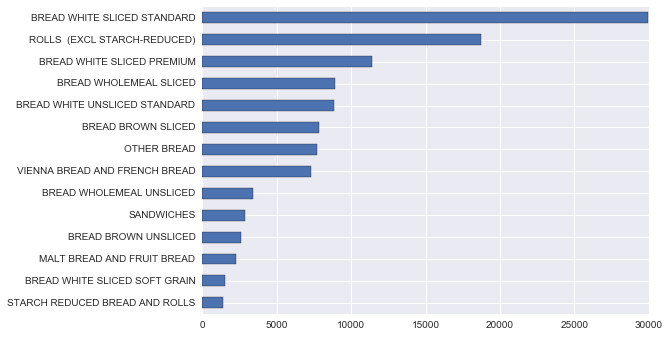

In [15]:
dfb.minor_text.value_counts().sort_values().plot(kind='barh')
#pd.value_counts(dfb['minor_text'].values).plot(kind='barh') #also works

### 3.4. Compare two related quantities

In [16]:
#I don't know what this question means

### 3.5. Make a scatterplot

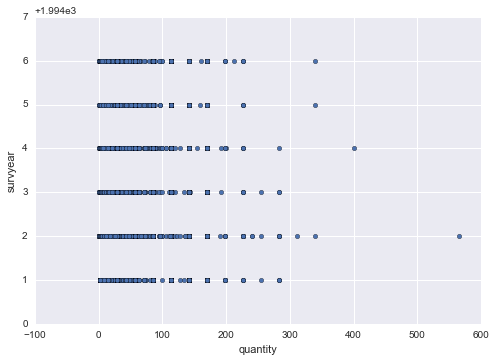

In [17]:
#this dataset only has one numeric variable
dfs = dfb.apply(pd.to_numeric, errors='ignore')
dfs.plot(x='quantity', y='survyear', kind='scatter')

### 3.6. Make a time-series plot

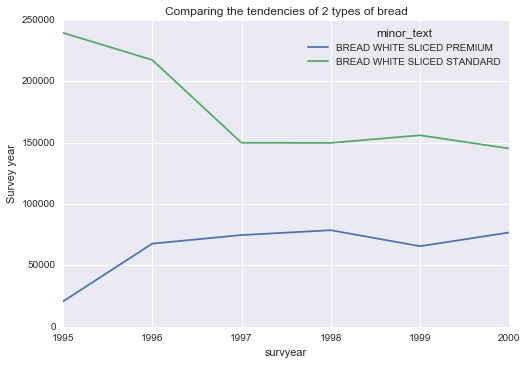

In [18]:
dfc = dfb[(dfb.minor_text == "BREAD WHITE SLICED STANDARD") | (dfb.minor_text == "BREAD WHITE SLICED PREMIUM")]
pd.crosstab(dfc.survyear, dfc.minor_text, values = dfc.quantity, aggfunc=np.sum).plot(kind='line')
plt.title('Comparing the tendencies of 2 types of bread')
plt.ylabel('Survey year')

### 3.7. Questions, questions, questions ...

- Are there some insights? Correlations? A hypothesis I would like to investigate further? Other questions?
- An interesting narrative: a way of presenting the insights using text and plots from the above, that tells us a compelling story?
- Other trends/relationships that will make it more complete?

I'll tell you a story to make my point:

I once helped a PhD student who looked at a survey very much like the UK above: ask a number of families what they have bought, and look at food items and food groups and nutrients. I have this very vivid image of a blackboard full of the names of _all food items and all nutrients, and their combinations_, because we had to analyse _everything_.

And my role was to help that PhD student to analyse _everything_.

Last night I listened to https://www.youtube.com/watch?v=ek05c2HBF7g and came across this notion of "data journalism", which gave me a totally different point of view. There's this job of helping people analyse their data, there's the masse of data, and there's the underlying reality. And our stories, if they are to be stories and if they are to be _our_ stories, are not really about data! They are about the underlying reality. That's what we want to understand. And, being human, we can only look at reality one window at a time, one landscape at a time, one car-crash at a time. We want to understand, bit by bit.

So, back to this "food" business, what was I doing wrong, and how could I proceed differently?

I was actively trying not to look at the data itself. I was not interested in the underlying reality. I was passively waiting for some PhD student to tell me what kind of analysis was needed, because I really didn't care about food. I was obviously going nowhere...

So now I've looked at http://britains-diet.labs.theodi.org/ and found what has risen over the years: fruits, ready-meals, mushrooms ... In terms of fresh fruits, bananas have taken the place of oranges and apples. I've also thought about the time-frame: what was I doing in 1974, when these surveys started, and in 2000, the last year for which there's raw open data? Has the number of people per family been reduced, and if so, by how much? I had complained about the lack of numerical variables, but I have "money": how much families have spent.